<a href="https://colab.research.google.com/github/joaovvrodrigues/data-analysis/blob/main/Adam_Sandler_IMBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de Dados sobre os filmes do Adam Sandler utilizando a API da IMDb.

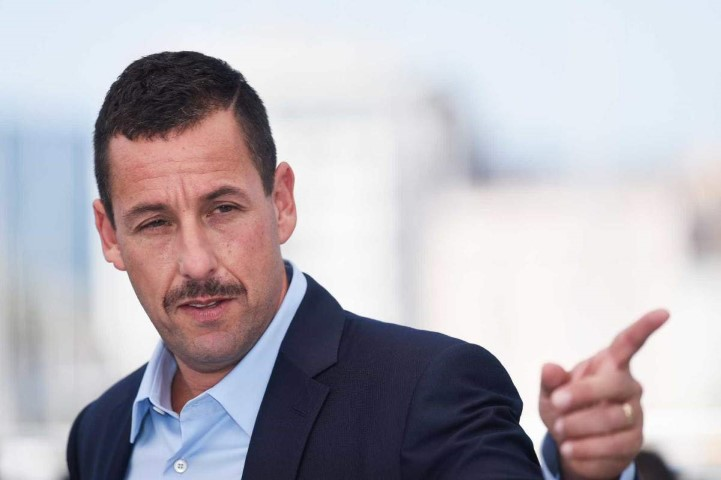

Análise de Dados sobre os filmes do Adam Sandler.


*   Filmes mais populares
*   Grafico de filmes mais populares
*   Filmes menos populares
*   Gênero dos filmes (Maior quantidade e menor quantidade)
*   Gênero dos filmes mais e menos populares
*   Gráfico de Filmes por ano
*   WordCloud de todas as sinopses
*   Prêmios
*   Foi escritor de quantos filmes que atuou

In [388]:
!pip install IMDbPY

In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline
plt.style.use('ggplot')

Buscando filmografia de Adam Sandler

In [390]:
from imdb import IMDb

ia = IMDb()

adamSandler = ia.get_person_filmography(personID='0001191')

Buscando todos os filmes que esteve presente como Ator

In [391]:
filmesIDs = []
filmes = []

for index, filmeID in enumerate(adamSandler['data']['filmography']['actor']): # Todos os filmes que Adam Sandler atuou
  filmesIDs.append(filmeID.movieID)
  filme = ia.get_movie(filmeID.movieID)
  filmes.append(filme)

Separando as informações mais importantes

In [392]:
titulos = []
generos = []
notas = []
votos = []
anos = []
escritores = []
diretores = []

for filme in filmes:
  if 'rating' in filme.keys():
    notas.append(filme['rating'])
  else:
    notas.append(0)

  if 'votes' in filme.keys():
    votos.append(filme['votes'])
  else:
    votos.append(0)

  if 'votes' in filme.keys():
    anos.append(filme['year'])
  else:
    anos.append(0)
  
  if 'writer' in filme.keys():
    escritores.append(filme['writer'])

  if 'directors' in filme.keys():
    diretores.append(filme['directors'])
  
  
  titulos.append(filme['title'])
  generos.append(filme['genres'])


Montando um data frame

In [393]:
dataFrame = [titulos, generos, notas, votos, anos]

df = pd.DataFrame(dataFrame).transpose()
df.columns=['Titulo', 'Genero', 'Nota', 'Avaliacao', 'Ano']

frame_remove = df.loc[df['Ano'] == 0] # Removendo filmes ainda não lançados

df = df.drop(frame_remove.index)

In [394]:
df.head()

,Titulo,Genero,Nota,Avaliacao,Ano
2,Hubie Halloween,"[Comedy, Fantasy, Mystery]",5.2,20937,2020
3,Nature Planet,"[Short, Comedy]",8.1,24,2020
4,Princess Bride,"[Short, Comedy, Fantasy]",7.5,357,2020
5,Goldman v Silverman,"[Short, Comedy, Drama]",6.5,1381,2020
6,Uncut Gems,"[Crime, Drama, Thriller]",7.4,205120,2019


Ordenando por Notas, podemos observar que as maiores notas são de programas cujo Adam Sandler participou.

Um dos filmes com melhores avaliações foi uma refilmagem utilizando celulares dele e de Hugh Jackman. Notícia: [Hugh Jackman e Adam Sandler refazem filme dos anos 1980 com celulares](https://www1.folha.uol.com.br/ilustrada/2020/07/hugh-jackman-e-adam-sandler-refazem-filme-dos-anos-1980-com-celulares.shtml)


E o filme 'verdadeiro' com melhor nota é **Reine sobre Mim**, de 2007 com 7.4 de média, seguido de **Jóias Brutas**, lançado na Netflix em 2019.  Fato interessante que ambos **são filmes dramáticos**.

In [395]:
df.sort_values(by=['Nota'], ascending=False).head(8)

,Titulo,Genero,Nota,Avaliacao,Ano
72,The Larry Sanders Show,[Comedy],8.4,7366,1992
26,Brooklyn Nine-Nine,"[Comedy, Crime]",8.4,209847,2013
17,Conan,"[Comedy, Music, Talk-Show]",8.1,22203,2010
3,Nature Planet,"[Short, Comedy]",8.1,24,2020
68,Saturday Night Live,"[Comedy, Music]",8.1,41985,1975
4,Princess Bride,"[Short, Comedy, Fantasy]",7.5,357,2020
40,Reign Over Me,[Drama],7.4,92473,2007
6,Uncut Gems,"[Crime, Drama, Thriller]",7.4,205120,2019


Os filmes com piores notas são todos em sua maioria de comédia, Ir ao Mar, ou Comédia em Alto Mar com a pior nota disparado, curioso é que foi o seu **primeiro filme**, logo após vem Cada Um Tem a Gêmea Que Merece. Na lista temos também The Ridiculous 6, que particurlamente é um filme que eu gosto bastante.

In [396]:
df.sort_values(by=['Nota'], ascending=True).head(10)

,Titulo,Genero,Nota,Avaliacao,Ano
78,Going Overboard,[Comedy],1.8,12197,1989
31,Jack and Jill,[Comedy],3.3,77041,2011
50,Couch,"[Comedy, Short]",4.4,1185,2003
75,The Dog Police,[Comedy],4.5,13,1990
8,Saturday Night Live: Cut for Time,[Comedy],4.7,117,2013
43,Deuce Bigalow: European Gigolo,[Comedy],4.7,48113,2005
60,The Peeper,"[Animation, Short, Comedy]",4.8,46,1999
57,The Animal,"[Comedy, Sci-Fi]",4.8,56557,2001
19,The Ridiculous 6,"[Action, Adventure, Comedy, Western]",4.8,43551,2015
53,A Day with the Meatball,"[Comedy, Short]",5.1,151,2002


Removendo aparições em TalkShow's

In [397]:
frame_remove = df.loc[df['Titulo'] == 'Saturday Night Live']
df.drop(frame_remove.index, inplace=True)
frame_remove = df.loc[df['Titulo'] == 'Nature Planet']
df.drop(frame_remove.index, inplace=True)
frame_remove = df.loc[df['Titulo'] == 'Conan']
df.drop(frame_remove.index, inplace=True)
frame_remove = df.loc[df['Titulo'] == 'The Larry Sanders Show']
df.drop(frame_remove.index, inplace=True)
frame_remove = df.loc[df['Titulo'] == 'Brooklyn Nine-Nine']
df.drop(frame_remove.index, inplace=True)

Média de notas dos filmes do Adam Sandler

In [398]:
df['Nota'].mean()

5.935616438356168

Aparentemente Adam Sandler teve uma aparição em ABC Afterschool Special que é uma série de antologia televisiva norte-americana, com apenas 6 anos de idade.

In [399]:
df.sort_values(by=['Ano'], ascending=True).head(1)

,Titulo,Genero,Nota,Avaliacao,Ano
76,ABC Afterschool Specials,"[Adventure, Comedy, Drama, Family]",7,850,1972


Contagem de quantos filmes de Comédia, Drama, Romance e Suspense ele fez. 

Adam Sandler tem em sua lista incríveis 70 filmes de Comédia, 16 de Romance, 16 de Drama e 2 de Suspense.
Seus dois filmes de suspense são ['Uncut Gems de 2019', 'Punch-Drunk Love de 2002'] 



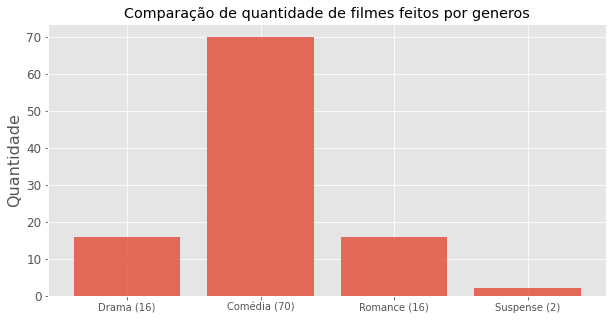

In [400]:
comediaNota = dramaNota = dramaNota = romanceNota = suspenseNota = comedia = drama = romance = suspense = 0
suspenseTitulo = []

for (i, linha) in df.iterrows():
  if 'Comedy' in linha['Genero']:
    comediaNota += linha['Nota']
    comedia += 1

  if 'Drama' in linha['Genero']:
    dramaNota += linha['Nota']
    drama += 1

  if 'Romance' in linha['Genero']:
    romanceNota += linha['Nota']
    romance += 1

  if 'Thriller' in linha['Genero']:
    suspenseTitulo.append("{} de {}".format(linha['Titulo'], linha['Ano']))
    suspenseNota += linha['Nota']
    suspense += 1

print('Adam Sandler tem em sua lista incríveis {} filmes de Comédia, {} de Romance, {} de Drama e {} de Suspense.'.format(comedia, romance, drama, suspense))
print('Seus dois filmes de suspense são {} \n'.format(suspenseTitulo))

quantidades = [drama, comedia, romance, suspense]
langs = ['Drama ({})'.format(quantidades[0]), 'Comédia ({})'.format(quantidades[1]), 'Romance ({})'.format(quantidades[2]), 'Suspense ({})'.format(quantidades[3])]

plt.figure(figsize=(10,5))
plt.bar(langs, quantidades, align='center', alpha=0.8)
plt.yticks(fontsize=12)
plt.ylabel('Quantidade', fontsize=16)
plt.title('Comparação de quantidade de filmes feitos por generos')
plt.show()

Gráfico de comparação de média de notas com generos dos filmes.

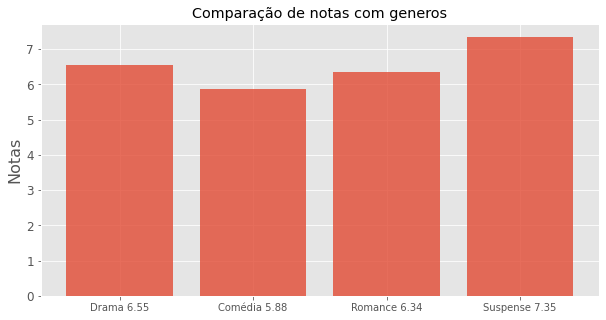

In [401]:
medias = [dramaNota/16, comediaNota/70, romanceNota/16, suspenseNota/2]

langs = ['Drama {:.2f}'.format(medias[0]), 'Comédia {:.2f}'.format(medias[1]), 'Romance {:.2f}'.format(medias[2]), 'Suspense {:.2f}'.format(medias[3])]

plt.figure(figsize=(10,5))
plt.bar(langs, medias, align='center', alpha=0.8)
plt.yticks(fontsize=12)
plt.ylabel('Notas', fontsize=16)
plt.title('Comparação de notas com generos')
plt.show()

Gráfico de notas ao longo dos anos

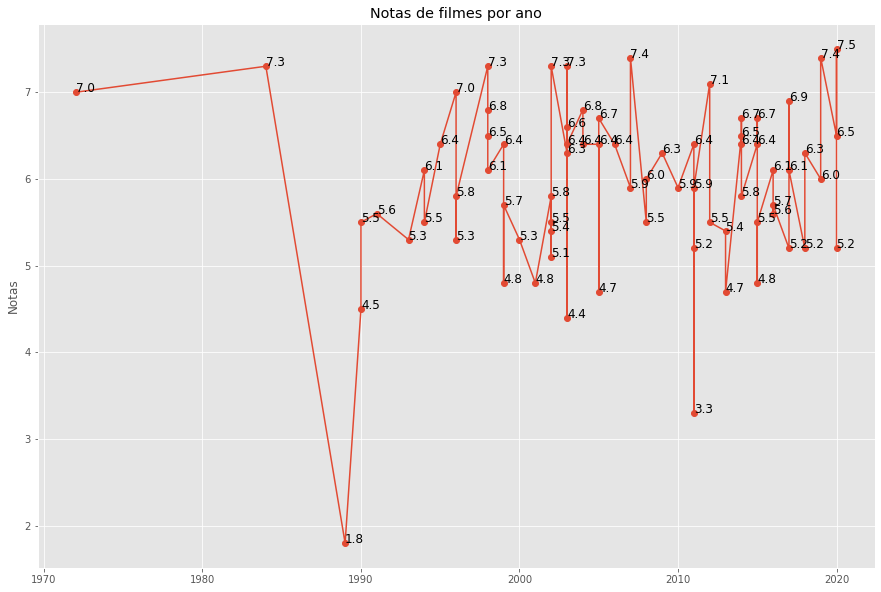

In [402]:
df = df.sort_values(by=['Ano'], ascending=True)
plt.figure(figsize=(15,10))
plt.plot(df['Ano'], df['Nota'], "-o")

for x, y in zip(df['Ano'], df['Nota']):
    plt.text(x, y, str(y), color="black", fontsize=12)

plt.ylabel('Notas')
plt.title('Notas de filmes por ano')
plt.show()

Gráficos de notas médias por ano

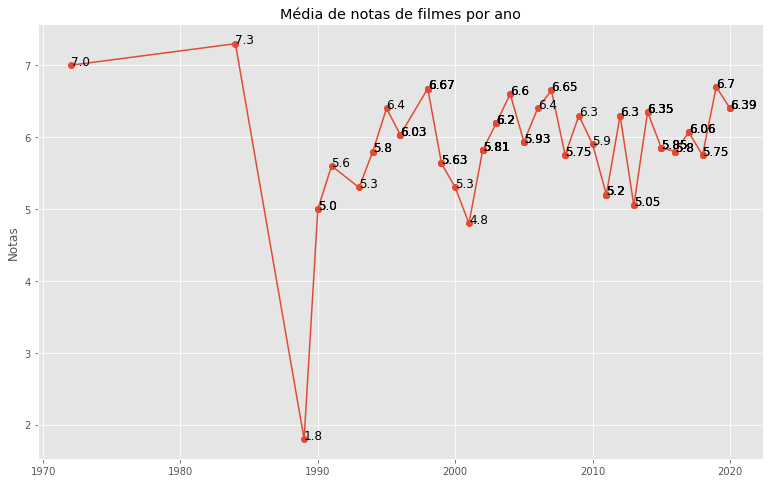

In [403]:
df = df.sort_values(by=['Ano'], ascending=True)
ano = []
media = []

for i in df['Ano']:
  dfAno = df[df['Ano'] == i]
  ano.append(i)

  media.append(dfAno['Nota'].mean())

plt.figure(figsize=(13,8))
plt.plot(ano, media, "-o")

for x, y in zip(ano, media):
    plt.text(x, y, str(y)[0:4], color="black", fontsize=12)

plt.ylabel('Notas')
plt.title('Média de notas de filmes por ano')
plt.show()

Adam Sandler escreveu e atuou em quantos filmes ?

In [404]:
for idx,i in enumerate(escritores):
    if 'Adam Sandler' in i[0]['name']:
      print('Adam Sandler escreveu e atuou {}, com médias de {}'.format(df['Titulo'][idx], df['Nota'][idx]))


Adam Sandler escreveu e atuou The Week Of, com médias de 5.2
Adam Sandler escreveu e atuou Grown Ups, com médias de 5.9
Adam Sandler escreveu e atuou You Don't Mess with the Zohan, com médias de 5.5


Quais diretores mais fizeram filmes com Adam Sandler


In [405]:
dire = []
for i in diretores:
    dire.append(i[0]['name'])

diretor = pd.DataFrame(dire)
diretor.value_counts()

Dennis Dugan               8
Frank Coraci               6
Steven Brill               5
Paul Thomas Anderson       5
Peter Segal                4
Genndy Tartakovsky         4
Benny Safdie               2
Derek Drymon               1
Jeremiah Zagar             1
Jason Reitman              1
James L. Brooks            1
Ernest R. Dickerson        1
Valerie Breiman            1
Kyle Newacheck             1
Chris Rock                 1
Chris Columbus             1
Charles Francis Kinnane    1
Bobcat Goldthwait          1
Bob Saget                  1
Judd Apatow                1
Michael Lehmann            1
Luke Greenfield            1
Tom Winkler                1
Mike Bigelow               1
Mike Binder                1
Mike Mitchell              1
Nicholaus Goossen          1
Noah Baumbach              1
Nora Ephron                1
Robert Smigel              1
Sean Anders                1
Seth Kearsley              1
Steve Barron               1
Tamra Davis                1
Tom Brady     